# Kaggle classification competition (Dogs vs Cats)

Training a CNN to classify a small subset of images in Dogs vs Cats dataset hosted on Kaggle

## The Dogs vs Cats dataset

We will grab the dataset from kaggle and create different folders to manage the train, validation and test sets for cats and dogs.

In [47]:
import os, shutil
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#If you want to run this code locally, change this to the path you downloaded your dataset to
orig_dataset_path = '/Users/Kelvin/Desktop/Projects/git/CatsVsDogsCNN/original_dataset/train'

target_loc = '/Users/Kelvin/Desktop/Projects/git/CatsVsDogsCNN/data'
os.mkdir(target_loc)

train_dir = os.path.join(target_loc, 'train')
validation_dir = os.path.join(target_loc, 'validation')
testing_dir = os.path.join(target_loc, 'testing')

dirs_to_create = [train_dir, validation_dir, testing_dir]

for i in range(3):
    os.mkdir(dirs_to_create[i])

categories = ['cats', 'dogs']

for i in range(3):
    for j in range(len(categories)):
        new_dir = os.path.join(dirs_to_create[i], categories[j])
        os.mkdir(new_dir)

cat_picture_names_1_1000 = ['cat.{}.jpg'.format(i) for i in range(1000)]
cat_picture_names_1000_1500 = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
cat_picture_names_1500_2000 = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

dog_picture_names_1_1000 =  ['dog.{}.jpg'.format(i) for i in range(1000)]
dog_picture_names_1000_1500 = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
dog_picture_names_1500_2000 = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for i in range(len(cat_picture_names_1_1000)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(train_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1_1000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(cat_picture_names_1000_1500)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(validation_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1000_1500[i])
    shutil.copyfile(src, dst)
    
for i in range(len(cat_picture_names_1500_2000)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(testing_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1500_2000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1_1000)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1_1000[i])
    dst = os.path.join(train_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1_1000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1000_1500)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1000_1500[i])
    dst = os.path.join(validation_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1000_1500[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1500_2000)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1500_2000[i])
    dst = os.path.join(testing_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1500_2000[i])
    shutil.copyfile(src, dst)

Now we have created three separate folders, training, validation, and testing with 2000, 1000, 1000 balanced samples of cats and dogs images respectively

Lets double check that the images are in the correct spots.

In [3]:
train_dog_dir = os.path.join(train_dir, 'dogs')
train_cat_dir = os.path.join(train_dir, 'cats')

validation_dog_dir = os.path.join(validation_dir, 'dogs')
validation_cat_dir = os.path.join(validation_dir, 'cats')

test_dog_dir = os.path.join(testing_dir, 'dogs')
test_cat_dir =os.path.join(testing_dir, 'cats')

print('Number of samples in train_dog:', len(os.listdir(train_dog_dir)))
print('Number of samples in train_cat:', len(os.listdir(train_cat_dir)))

print('Number of samples in validation_dog_dir:', len(os.listdir(validation_dog_dir)))
print('Number of samples in validation_cat_dir:', len(os.listdir(validation_cat_dir)))
      
print('Number of samples in testing_dog_dir:', len(os.listdir(test_dog_dir)))
print('Number of samples in testing_cat_dir:', len(os.listdir(test_cat_dir)))

Number of samples in train_dog: 1000
Number of samples in train_cat: 1000
Number of samples in validation_dog_dir: 500
Number of samples in validation_cat_dir: 500
Number of samples in testing_dog_dir: 500
Number of samples in testing_cat_dir: 500


## Data preprocessing

The data samples are encoded in JPEG and we need to format them into the correct format to feed the images into the neural network. Essentially, we need to perform the following:

    - 1) Read the picture files
    - 2) Decode the JPEG files into RGB grids of pixels
    - 3) Convert into floating point tensors.
    - 4) Rescale pixel values into [0,1] intervals

In [4]:
#Rescale data in images 
train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_data_gen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

validation_generator = test_data_gen.flow_from_directory(
    validation_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data, label in train_generator:
    print('Data shape from generator: ', data.shape)
    print('label shape from generator: ', label.shape)
    break

Data shape from generator:  (20, 150, 150, 3)
label shape from generator:  (20,)


It seems like the generator is working. It is creating batches of 20 samples of 150,150,3 with the corresponding labels.

## Model Definition

In [6]:
model = models.Sequential()
# By default Max pooling layers are 2x2 in size
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
#Now we will define a flatten layer, followed by two densely connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
model.compile(optimizer = optimizers.rmsprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
history = model.fit_generator(train_generator, steps_per_epoch = 2000//20, epochs = 30, validation_data = validation_generator, validation_steps = 1000//20)

Epoch 1/30
100/100 [==============================] - 155s 2s/step - loss: 0.6880 - acc: 0.5440 - val_loss: 0.6739 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 144s 1s/step - loss: 0.6589 - acc: 0.6140 - val_loss: 0.6230 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 144s 1s/step - loss: 0.6064 - acc: 0.6755 - val_loss: 0.6057 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 145s 1s/step - loss: 0.5544 - acc: 0.7100 - val_loss: 0.6351 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 127s 1s/step - loss: 0.5249 - acc: 0.7365 - val_loss: 0.5273 - val_acc: 0.7460
Epoch 6/30
100/100 [==============================] - 145s 1s/step - loss: 0.4934 - acc: 0.7555 - val_loss: 0.5088 - val_acc: 0.7520
Epoch 7/30
100/100 [==============================] - 144s 1s/step - loss: 0.4673 - acc: 0.7710 - val_loss: 0.5264 - val_acc: 0.7490
Epoch 8/30
100/100 [==============================] - 145s 1s/step - 

## Saving the Model

It is good practice to always save the model after long training session

In [13]:
model.save('cats_and_dogs_v1')

In [14]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

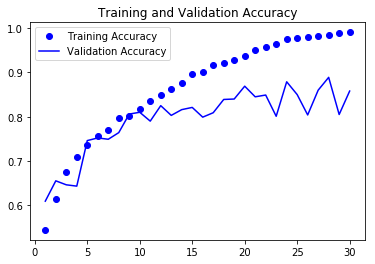

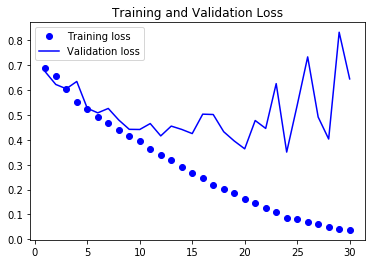

In [15]:
acc = history.history['acc']
loss = history.history['loss']

validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, validation_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


There is a high variance in the Validation loss. 

From the Accuracy plot above, we can see that the Training accuracy increases until it reaches nearly 100% while the validation accuracy fluctuates around 80%-88% accuracy.

From the Loss plot above, we can see that the validation loss reaches a minimum around 25 epochs, and the training data's training loss keeps decreasing until it reaches nearly 0%.

Instead of adding dropout layers or weight decay, we will use data augmentation techniques which is unique to computer vision.

# Data Augmentation

Like the Deep Self Driving Car project, we will generate more training data from the existing training dataset.

We will perform random transformations that will create new "believable" looking images.

The goal of this is so that at training time, your model will never see the exact same picture twice, which helps expose the model to more aspects of the data and generalize better.

In [17]:
#We will use Keras's built in ImageDataGenerator to create some new images.
generated_data = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

To explain the code above:
    - Rotate the image by a range of 0-40.
    - Widft_shift_range and height_shift_range are ranges (fraction of the total width or height) to randomly translate pictures horizontally or vertically.
    - shear_range, randomly applies shearing transformations
    - zoom_range, randomly zooming into pictures
    - horizontal flip, randomly flipping half the images horizontally.
    - fill_mode, is the strategy to fill in newly created pixels from a rotation or a shift.

In [26]:
fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]
img_path = fnames[1]
img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape(1, 150, 150, 3)

## Lets look at some of these augmented images

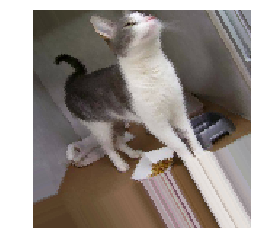

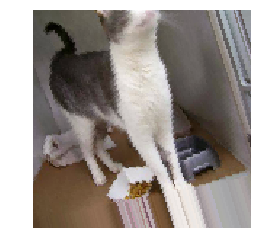

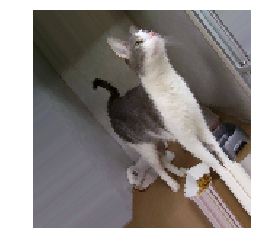

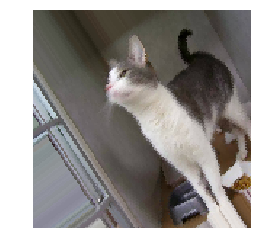

In [30]:
i = 0
for batch in generated_data.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Adding a Dropout layer

Along with the augmented images, we will also add a Dropout layer right before the fully connected layers.

In [40]:
model_drp = models.Sequential()
model_drp.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model_drp.add(layers.MaxPooling2D((2,2)))
model_drp.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_drp.add(layers.MaxPooling2D((2,2)))
model_drp.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model_drp.add(layers.MaxPooling2D((2,2)))
model_drp.add(layers.Conv2D(128, (3,3), activation ='relu'))
model_drp.add(layers.MaxPooling2D((2,2)))
model_drp.add(layers.Flatten())

model_drp.add(layers.Dropout(0.5))
model_drp.add(layers.Dense(512, activation = 'relu'))
model_drp.add(layers.Dense(1, activation = 'sigmoid'))

model_drp.compile(optimizer = optimizers.adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

Retraining the model using the data augmentation generator

In [41]:
augmented_train_datagen = ImageDataGenerator(rescale = 1./255,
                                            rotation_range = 40,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True)

#Do not augment the test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = augmented_train_datagen.flow_from_directory(train_dir, 
                                                              target_size = (150, 150),
                                                              batch_size = 20,
                                                              class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')
history = model_drp.fit_generator(train_generator, steps_per_epoch = (2000//20), epochs = 100, validation_data = validation_generator, validation_steps = (1000//20))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 164s 2s/step - loss: 0.6925 - acc: 0.5170 - val_loss: 0.6911 - val_acc: 0.5180
Epoch 2/100
100/100 [==============================] - 168s 2s/step - loss: 0.6843 - acc: 0.5515 - val_loss: 0.6635 - val_acc: 0.5970
Epoch 3/100
100/100 [==============================] - 162s 2s/step - loss: 0.6652 - acc: 0.5890 - val_loss: 0.6390 - val_acc: 0.6420
Epoch 4/100
100/100 [==============================] - 218s 2s/step - loss: 0.6411 - acc: 0.6170 - val_loss: 0.6603 - val_acc: 0.5470
Epoch 5/100
100/100 [==============================] - 200s 2s/step - loss: 0.6329 - acc: 0.6345 - val_loss: 0.5959 - val_acc: 0.7040
Epoch 6/100
100/100 [==============================] - 216s 2s/step - loss: 0.6110 - acc: 0.6830 - val_loss: 0.5831 - val_acc: 0.7010
Epoch 7/100
100/100 [==============================] - 197s 2s/step - loss: 0.6054 - acc: 0.6645 - val_loss: 0.6

100/100 [==============================] - 150s 1s/step - loss: 0.4130 - acc: 0.8070 - val_loss: 0.4088 - val_acc: 0.8010
Epoch 62/100
100/100 [==============================] - 149s 1s/step - loss: 0.4218 - acc: 0.8040 - val_loss: 0.3650 - val_acc: 0.8440
Epoch 63/100
100/100 [==============================] - 150s 1s/step - loss: 0.4022 - acc: 0.8160 - val_loss: 0.3806 - val_acc: 0.8330
Epoch 64/100
100/100 [==============================] - 151s 2s/step - loss: 0.4099 - acc: 0.8110 - val_loss: 0.3689 - val_acc: 0.8480
Epoch 65/100
100/100 [==============================] - 150s 1s/step - loss: 0.4037 - acc: 0.8125 - val_loss: 0.3600 - val_acc: 0.8500
Epoch 66/100
100/100 [==============================] - 151s 2s/step - loss: 0.4000 - acc: 0.8190 - val_loss: 0.3639 - val_acc: 0.8520
Epoch 67/100
100/100 [==============================] - 151s 2s/step - loss: 0.4028 - acc: 0.8210 - val_loss: 0.3532 - val_acc: 0.8560
Epoch 68/100
100/100 [==============================] - 150s 1s/step

In [42]:
model_drp.save('cats_and_dogs_v2.h5')

## Plotting the new model

In [43]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

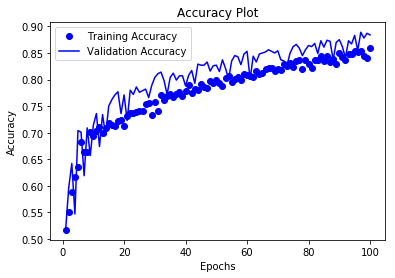

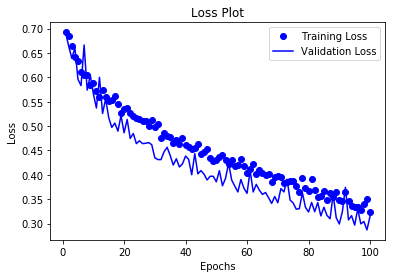

In [45]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
(np.max(val_acc) * 100)

88.89999961853027

Interestingly, we now have reached a ~89% accuracy by adding dropout and augmented images.

One interesting note is that the validation accuracy keeps on increasing and shows no sign of overfitting yet. So perhaps training this model on more epochs, we will get a more accurate model.